<a href="https://colab.research.google.com/github/dexafrica/TravelGAN/blob/development/workspace4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
self.g_lr
self.hidden_size

**Data Processing**

In [0]:
pip install pandasql s2sphere pyproj nltk

In [0]:
import pandas as pd
import pandasql as psql
from pyproj import Proj, transform
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

In [0]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

In [0]:
data_path = 'drive/My Drive/ThesisProposal/trips_taz.csv'
train_data = pd.read_csv(data_path) 

In [0]:
train_data.head()

In [0]:
cols = ['HID', 'ORIG', 'DEST', 'D_HREDE', 'D_MOTIF']
test_data = train_data[cols]
test_data['DEP_TIME'] = test_data['D_HREDE'].map(int).astype(str).str.zfill(4).str[:2] + ':' + test_data['D_HREDE'].map(int).astype(str).str.zfill(4).str[2:] + ':00'
test_data['DEP_TIME'] = pd.to_datetime( pd.to_timedelta(test_data['DEP_TIME']).dt.round('5min') ).dt.strftime("%H:%M:%S")
test_data['D_MOTIF'] = test_data['D_MOTIF'].astype(str)

test_data['END_TIME'] = test_data['DEP_TIME'] + timedelta(hours=1)
test_origs = test_data.groupby('HID')['ORIG'].apply(' '.join).reset_index(name='ORIGS')
test_times = test_data.groupby('HID')['DEP_TIME'].apply(' '.join).reset_index(name='TIMES')
test_purpose = test_data.groupby('HID')['D_MOTIF'].apply(' '.join).reset_index(name='PURPOSE')

end_rec = test_data.groupby(['HID']).last().reset_index()
first_rec = test_data.groupby(['HID']).first().reset_index()

In [10]:
full_trip = test_origs['ORIGS'] + ' ' + end_rec['DEST']
full_times = test_times['TIMES'] + ' ' + pd.to_datetime(end_rec['END_TIME']).dt.strftime("%H:%M:%S")
full_purpose = test_purpose['PURPOSE'] + ' ' + first_rec['D_MOTIF']

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:208: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


In [22]:
a = full_trip[0:5].str.split(' ')
b = full_times[0:5].str.split(' ')
c = full_purpose[0:5].str.split(' ')
d = test_origs['HID']
for i in range(len(a)):
  print (d[i])
  for j in range(len(a[i])):
    mlist = [a[i][j], b[i][j], c[i][j]]
    print (mlist)
    # print(a[i][j])
    # print(b[i][j])
    # print(c[i][j])
  # for col in row:


1000002_1
['4cc8de61f2e92d05', '11:30:00', '6']
['4cc8de67553ddeaf', '13:00:00', '11']
['4cc8de61f2e92d05', '14:00:00', '6']
1000002_2
['4cc8de61f2e92d05', '11:30:00', '6']
['4cc8de67553ddeaf', '13:00:00', '11']
['4cc8de61f2e92d05', '21:00:00', '7']
['4cc8dea4fa05383f', '23:00:00', '11']
['4cc8de61f2e92d05', '00:00:00', '6']
1000013_1
['4cc91ea026fa376b', '11:00:00', '5']
['4cc91ea19002424f', '11:55:00', '11']
['4cc91ea026fa376b', '12:55:00', '5']
1000013_2
['4cc91ea026fa376b', '07:30:00', '1']
['4cc91a5cdca68651', '11:00:00', '2']
['4cc91a43c5089bad', '13:30:00', '2']
['4cc90f48bf459b03', '15:30:00', '11']
['4cc91ea026fa376b', '19:00:00', '6']
['4cc8d8d2dcb61c63', '22:00:00', '11']
['4cc91ea026fa376b', '23:00:00', '1']
1000013_3
['4cc9115a5ea8e831', '07:30:00', '4']
['4cc91954da4e15e7', '15:00:00', '11']
['4cc91ea026fa376b', '16:00:00', '4']


In [0]:
end_dest = test_data.groupby(['HID']).last().reset_index()
# test_data['END_TIME'] = (pd.to_datetime( pd.to_timedelta(test_data['DEP_TIME']) + timedelta(hours=1)).dt.round('5min') ).dt.strftime("%H:%M:%S")

In [0]:
df_test = pd.merge(test_data, last_records, on='HID', how='outer')
# df_outer['TRAVEL'] = df_outer['ORIG'] + ' ' + df_outer['TRIPS']

In [0]:
full_trip = test_origs['ORIGS'] + ' ' + end_dest['DEST']
full_times = test_times['TIMES'] + ' ' + end_dest['END_TIME']

In [111]:
test_origs['ORIGS']

0                         4cc8de61f2e92d05 4cc8de67553ddeaf
1         4cc8de61f2e92d05 4cc8de67553ddeaf 4cc8de61f2e9...
2                         4cc91ea026fa376b 4cc91ea19002424f
3         4cc91ea026fa376b 4cc91a5cdca68651 4cc91a43c508...
4                         4cc9115a5ea8e831 4cc91954da4e15e7
                                ...                        
139349                    4cc918e0542ef8a1 4cc9498d644bc153
139350                    4cc918e0542ef8a1 4cc9498d644bc153
139351                    4cc90437a7ae4e23 4cc9067e3e3d137b
139352                    4cc91ebe12e3c607 4cc91a6d7b36c175
139353    4cc90e5f5618f69f 4cc91a57466e13e9 4cc91a50a16c...
Name: ORIGS, Length: 139354, dtype: object

In [76]:
full_times[0]

'11:30:00 13:00:00 14:00:00'

In [56]:
last_records

,HID,ORIG,DEST,D_HREDE,DEP_TIME
0,1000002_1,4cc8de67553ddeaf,4cc8de61f2e92d05,1300,13:00:00
1,1000002_2,4cc8dea4fa05383f,4cc8de61f2e92d05,2300,23:00:00
2,1000013_1,4cc91ea19002424f,4cc91ea026fa376b,1155,11:55:00
3,1000013_2,4cc8d8d2dcb61c63,4cc91ea026fa376b,2200,22:00:00
4,1000013_3,4cc91954da4e15e7,4cc91ea026fa376b,1500,15:00:00
...,...,...,...,...,...
139349,9033510_1,4cc9498d644bc153,4cc918e0542ef8a1,2400,24:00:00
139350,9033510_2,4cc9498d644bc153,4cc918e0542ef8a1,2400,24:00:00
139351,9033848_1,4cc9067e3e3d137b,4cc90437a7ae4e23,2000,20:00:00
139352,9034248_1,4cc91a6d7b36c175,4cc91ebe4757effb,2115,21:15:00


In [47]:
test_times

,HID,TIMES
0,1000002_1,11:30:00 13:00:00
1,1000002_2,11:30:00 13:00:00 21:00:00 23:00:00
2,1000013_1,11:00:00 11:55:00
3,1000013_2,07:30:00 11:00:00 13:30:00 15:30:00 19:00:00 2...
4,1000013_3,07:30:00 15:00:00
...,...,...
139349,9033510_1,16:00:00 24:00:00
139350,9033510_2,16:00:00 24:00:00
139351,9033848_1,12:00:00 20:00:00
139352,9034248_1,15:15:00 21:15:00


In [49]:
test_origs

,HID,ORIGS
0,1000002_1,4cc8de61f2e92d05 4cc8de67553ddeaf
1,1000002_2,4cc8de61f2e92d05 4cc8de67553ddeaf 4cc8de61f2e9...
2,1000013_1,4cc91ea026fa376b 4cc91ea19002424f
3,1000013_2,4cc91ea026fa376b 4cc91a5cdca68651 4cc91a43c508...
4,1000013_3,4cc9115a5ea8e831 4cc91954da4e15e7
...,...,...
139349,9033510_1,4cc918e0542ef8a1 4cc9498d644bc153
139350,9033510_2,4cc918e0542ef8a1 4cc9498d644bc153
139351,9033848_1,4cc90437a7ae4e23 4cc9067e3e3d137b
139352,9034248_1,4cc91ebe12e3c607 4cc91a6d7b36c175


In [34]:
test_data[['ORIG', 'D_HREDE']].values

array([['4cc8de61f2e92d05', 1130],
       ['4cc8de67553ddeaf', 1300],
       ['4cc8de61f2e92d05', 1130],
       ...,
       ['4cc91a50a16ccfd9', 1025],
       ['4cc91a57466e13e9', 1630],
       ['4cc90e8b5da40229', 1800]], dtype=object)

**Normalize numeric variables**

In [0]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_test)

In [0]:
scaler_olng=scaler_olat=scaler_dlng=scaler_dlat = MinMaxScaler()

In [0]:
sc_olat = scaler_olat.fit_transform(train_data['S_ORIG_LAT'].values.reshape(-1,1))
sc_olng = scaler_olng.fit_transform(train_data['S_ORIG_LON'].values.reshape(-1,1))
sc_dlat = scaler_dlat.fit_transform(train_data['S_DEST_LAT'].values.reshape(-1,1))
sc_dlng = scaler_dlng.fit_transform(train_data['S_DEST_LON'].values.reshape(-1,1))

In [0]:
df_hid = train_data['HID']
num_cols = np.concatenate((sc_olat, sc_olng, sc_dlat, sc_dlng), axis=1)
normalized_df = pd.DataFrame(num_cols, columns=["Orig_Lat", "Orig_Lng", "Dest_Lat", "Dest_Lng"])
df = pd.concat([df_hid, normalized_df], axis=1)

In [0]:
_t = df[['Orig_Lat', 'Orig_Lng', 'Dest_Lat', 'Dest_Lng']].values.tolist()

In [0]:
normalized_df.columns

Index(['Orig_Lat', 'Orig_Lng', 'Dest_Lat', 'Dest_Lng'], dtype='object')

In [0]:
_s = df.groupby('HID')['Orig_Lat', 'Orig_Lng', 'Dest_Lat', 'Dest_Lng'].apply(pd.Series.tolist).tolist()

In [0]:
from keras.preprocessing.sequence import pad_sequences

trips_seq = pad_sequences(_s, maxlen=15)

In [0]:
train_data['D_HREDE'] = train_data['D_HREDE'].map(int).astype(str).str.zfill(4).str[:2] + ':' + train_data['D_HREDE'].map(int).astype(str).str.zfill(4).str[2:] + ':00'
train_data['DEP_TIME'] = pd.to_datetime( pd.to_timedelta(train_data['D_HREDE']).dt.round('5min') ).dt.strftime("%H:%M:%S")
train_data['TRIP'] = train_data[['ORIG', 'DEST', 'DEP_TIME']].values.tolist()

In [8]:
train_data['D_HREDE'] = train_data['D_HREDE'].map(int).astype(str).str.zfill(4).str[:2] + ':' + train_data['D_HREDE'].map(int).astype(str).str.zfill(4).str[2:] + ':00'
train_data['DEP_TIME'] = pd.to_datetime( pd.to_timedelta(train_data['D_HREDE']).dt.round('5min') ).dt.strftime("%H:%M:%S")
trips_data = train_data.groupby('HID')['DEST'].apply(' '.join).reset_index(name='TRIPS')
first_records = train_data.groupby(['HID']).first().reset_index()

df_outer = pd.merge(trips_data, first_records, on='HID', how='outer')
df_outer['TRAVEL'] = df_outer['ORIG'] + ' ' + df_outer['TRIPS']

cols = ['P_SEXE', 'P_AGE', 'P_STATUT', 'P_PERMIS', 'P_MOBIL', 'D_HREDE', 'ZT03', 'TRAVEL']
trips_data = df_outer[cols]

/usr/local/lib/python3.6/dist-packages/pandas/util/_decorators.py:208: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  return func(*args, **kwargs)


In [0]:
trips_data


In [0]:
# df_outer['TRAVEL'].to_csv('drive/My Drive/ThesisProposal/export_trip_101119.csv', index = None, header=True)
# SEQUENCE LENGTH CLEANUP
df_outer['LEN'] = len(df_outer['TRAVEL'].str.split(' '))
dt = df_outer.copy()
dt[['LEN']] = dt.apply(lambda row:int(len(row['TRAVEL'].split(' '))), axis=1).apply(pd.Series)
# Delete sequences of length = 2
trips_data = dt[dt.LEN != 2]

In [0]:
trips_data['TRAVEL'].to_csv('drive/My Drive/ThesisProposal/export_trip_251119.csv', index = None, header=True)

In [0]:
trips_data.shape

(133474, 26)

Prefix Tree

In [0]:
from typing import Tuple

class TrieNode(object):
    """
    Our trie node implementation. Very basic. but does the job
    """
    
    def __init__(self, loc: str, trip_data=None, epsilon=None):
        self.loc = loc
        self.children = []
        # Is it the last character of the word.`
        self.trip_ended = False
        # How many times this character appeared in the addition process
        self.counter = 1
        # dataset of trip chain
        self.trip_data = trip_data
        # trajectories in the database
        self.trajectories = self.add_trajectories()
        # set privacy budget, epsilon
        self.epsilon = epsilon
        # set height of prefix tree, h
        self.h = 10
        # set privacy budget allocation
        self.budget_allocation = self.get_privacy_allocation()
        # set noisy counter for nodes
        self.noisy_counter = 1
        # location taxononmy tree
        # self.location_tree = self.location_taxonomy()
        # set level of node
        self.level = 0

    def location_taxonomy(self):
      m = self.trip_data.str.split(' ').tolist()
      m = [i for j in m for i in j]
      n = np.unique(np.array(m))
      return n

    def add_trajectories(self):
      traj = None
      if self.trip_data is not None:
        # traj = self.trip_data.tolist()
        traj = self.trip_data
        return traj
      return None

    def get_privacy_allocation(self):
      priv_alloc = None
      if self.epsilon is not None:
        priv_alloc = self.epsilon / self.h
      return priv_alloc

    def get_noisy_count(in_count):
      noise_count = in_count
    
    

def add(root, trip: str):
    """
    Adding a word in the trie structure
    """
    node = root
    # print(trip)
    for loc in trip:
        # print (loc)
        found_in_child = False
        # Search for the character in the children of the present `node`
        for child in node.children:
            if child.loc == loc:
                # We found it, increase the counter by 1 to keep track that another
                # word has it as well
                child.counter += 1
                # And point the node to the child that contains this char
                node = child
                found_in_child = True
                break
        # We did not find it so add a new chlid
        if not found_in_child:
            new_node = TrieNode(loc)
            node.children.append(new_node)
            if node == root:
              new_node.level = 1
            # And then point node to the new child
            node = new_node
    # Everything finished. Mark it as the end of a word.
    node.trip_ended = True


def traverse(root, prefix):
  result = []
  if root.isEnd:
      result.append(prefix[:])
  for c,n in root.children.items():
      prefix.append(c)
      self.traverse(n, prefix, result)
      prefix.pop(-1)
  return [''.join(r) for r in result]


def find_prefix(root, prefix: str) -> Tuple[bool, int]:
    """
    Check and return 
      1. If the prefix exists in any of the words we added so far
      2. If yes then how may words actually have the prefix
    """
    node = root
    # If the root node has no children, then return False.
    # Because it means we are trying to search in an empty trie
    if not root.children:
        return False, 0
    for loc in prefix:
        char_not_found = True
        # Search through all the children of the present `node`
        for child in node.children:
            if child.loc == loc:
                # We found the char existing in the child.
                char_not_found = False
                # Assign node as the child containing the char and break
                node = child
                break
        # Return False anyway when we did not find a char.
        if char_not_found:
            return False, 0
    # Well, we are here means we have found the prefix. Return true to indicate that
    # And also the counter of the last node. This indicates how many words have this
    # prefix
    # return True, node.counter
    return node

In [0]:
# SEQUENCE LENGTH CLEANUP
df_outer['LEN'] = len(df_outer['TRAVEL'].str.split(' '))
dt = df_outer.copy()
dt[['LEN']] = dt.apply(lambda row:int(len(row['TRAVEL'].split(' '))), axis=1).apply(pd.Series)
# Delete sequences of length = 2
trips_data = dt[dt.LEN != 2]

In [0]:
# ADD DATA TO PREFIX TREE
m = trips_data['TRAVEL']
root = TrieNode('*', epsilon=0.1, trip_data=m)
# add nodes to PT
for index, row in trips_data.head(100).iterrows():
    add(root, row['TRAVEL'].split(' '))

In [0]:
#ADD NOISE TO ROOT COUNTER NODES

# Gets random laplacian noise for all values
location = 1.0
scale = 1.0
noise = np.random.laplace(location,scale, len(root.children))

index = 0
for child in root.children:
  child.noisy_counter = int(child.counter + noise[index])
  print(child.loc, child.counter, child.noisy_counter, [a.loc for a in child.children])
  index = index + 1

In [0]:
# Get empty nodes
empty_nodes = []
threshold = 3 

for child in root.children:
  if child.noisy_counter >= threshold:
    empty_nodes.append(child)
  child.noisy_counter = int(child.counter + noise[index])
  print(child.loc, child.counter, child.noisy_counter, [a.loc for a in child.children])

# Get non-empty nodes 

In [0]:
v = np.random.exponential(1, 43 ) 
np.random.laplace(scale=10, size=43)
np.random.exponential(100,10)

array([ 94.17648353, 186.17961014,  69.02215538, 170.53829771,
       197.70982627,  13.86274166, 187.00315051, 231.50771029,
        42.14003232,   4.80329335])

In [0]:
v

In [0]:
root = TrieNode('*')
for index, row in trips_data.head(100).iterrows():
    add(root, row['TRAVEL'].split(' '))

In [0]:
for index, row in trips_data.head(100).iterrows():
    add(root, row['TRAVEL'].split(' '))

In [0]:
st = '4cc91ea026fa376b 4cc91a5cdca68651 4cc91a43c5089bad 4cc90f48bf459b03 4cc91ea026fa376b 4cc8d8d2dcb61c63 4cc91ea026fa376b'
st = st.split(' ')
# print(find_prefix(root, st))
_s = find_prefix(root, st)

In [0]:
[[child.loc, child.counter] for child in root.children]

[['4cc8de61f2e92d05', 2],
 ['4cc91ea026fa376b', 2],
 ['4cc9115a5ea8e831', 1],
 ['4cc91e850fe0abcb', 7],
 ['4cc91a7ff19ec4df', 2],
 ['4cc9220723ee35db', 1],
 ['4cc904cb5970c637', 2],
 ['4cc92f8d16a7a8cb', 2],
 ['4cc9a1841cfbadf1', 2],
 ['4ccf318592063b57', 1],
 ['4cc92bbdf2c5a267', 3],
 ['4cc9225128e9b4fb', 3],
 ['4cc9161456a894c9', 2],
 ['4cc9068798fe9819', 1],
 ['4cc910ae61895893', 3],
 ['4cc8e5e9c467c2b1', 2],
 ['4cc926e695fa1537', 1],
 ['4ccf2b59e4981619', 1],
 ['4ccf2cf0c9f2d64d', 2],
 ['4cc94c208c8ba191', 1],
 ['4cc9123b404f4eb7', 2],
 ['4cc90f4473403dd7', 2],
 ['4cc9121d7ec9671d', 1],
 ['4cc9250b96642447', 2],
 ['4cc8deaf334b670b', 2],
 ['4cc919c22755c74d', 4],
 ['4cc91fa04a370f9b', 1],
 ['4cc922b63fe61d73', 1],
 ['4cc9253b4fcbe8a9', 4],
 ['4cc934e385cedcbd', 2],
 ['4cc921d989b3e455', 3],
 ['4cc9059a60defe95', 4],
 ['4cc91f86d5662339', 1],
 ['4cc91c3f7b254645', 1],
 ['4cc91e6e6bd3faa9', 1],
 ['4cc9161706e6cbcb', 4],
 ['4cc9214cfcaa3893', 4],
 ['4cc91b3dc982d39f', 1],
 ['4cc91975e

In [0]:
# for r in root.children:
index = 0
for child in root.children:
  child.noisy_counter = child.counter + v[index]
  print(child.loc, child.counter, child.noisy_counter, child.level, [a.loc for a in child.children])
  index = index + 1

In [0]:
trips_data['TRAVEL'].head(20)

In [0]:
root.location_tree

array(['4cb04e7fa5f86917', '4cb636ee9cc426af', '4cb7b30e962b92bd', ...,
       '4ccf4dd9395872a9', '4ccf623082f2efc1', '4ccf762b16eb59ab'],
      dtype='<U16')

In [0]:
# for r in root.children:
node = root
for child in node.children:
  print(child.loc, child.counter, [[a.loc, a.counter] for a in child.children])

In [0]:
r = root.location_tree
r

array(['4cb04e7fa5f86917', '4cb636ee9cc426af', '4cb7b30e962b92bd', ...,
       '4ccf4dd9395872a9', '4ccf623082f2efc1', '4ccf762b16eb59ab'],
      dtype='<U16')

In [0]:
n = m.str.split(' ')

In [0]:
import numpy as np 
  
# function to get unique values 
def unique(list1): 
    x = np.array(list1) 
    return np.unique(x)

In [0]:
a = trips_data['TRAVEL'].str.split(' ').tolist()
a = [i for j in a for i in j]

In [0]:
b = unique(a)

In [0]:
b[0]

'4cb04e7fa5f86917'

In [0]:
list1 = [10, 20, 10, 30, 40, 40] 
print("the unique values from 1st list is") 
unique(n) 

the unique values from 1st list is


array([list(['4cc854b4453c9ff1', '4cc854c8af502f51', '4cc854b4453c9ff1', '4cc854c8af502f51', '4cc854b4453c9ff1']),
       list(['4cc854b87e3625d9', '4cc905e10903f81b', '4cc854b87e3625d9']),
       list(['4cc854b87e3625d9', '4cc91a58cf5d9a1f', '4cc854b87e3625d9']),
       ...,
       list(['4ccf3eb6112a38cf', '4ccf2c6eae489b5d', '4ccf3985c3d1518d', '4ccf3eb6112a38cf']),
       list(['4ccf3eb6112a38cf', '4ccf3984590e1e1f', '4ccf3eb6112a38cf', '4ccf3984590e1e1f', '4ccf3eb6112a38cf']),
       list(['4ccf3eced2ca80ff', '4ccf3eced2ca80ff'])], dtype=object)

In [0]:
n.tolist().unique()

In [0]:
s = trips_data['TRAVEL'].head(4)
t = s.str.split(' ')
v = t[0]
v

['4cc8de61f2e92d05', '4cc8de67553ddeaf', '4cc8de61f2e92d05']

In [0]:
b = root.trajectories
c = b.str.split(' ')

In [0]:
f = root.trajectories[1]
[f.split(' ') for i in f]

In [0]:
s

0    4cc8de61f2e92d05 4cc8de67553ddeaf 4cc8de61f2e9...
1    4cc8de61f2e92d05 4cc8de67553ddeaf 4cc8de61f2e9...
2    4cc91ea026fa376b 4cc91ea19002424f 4cc91ea026fa...
3    4cc91ea026fa376b 4cc91a5cdca68651 4cc91a43c508...
Name: TRAVEL, dtype: object

In [0]:
st = '4cc8de61f2e92d05'
st = st.split(' ')
print(find_prefix(root, st))
# print(traverse(root, st))

In [0]:
m = trips_data['TRAVEL'].tolist()

In [0]:
m[1]

'4cc8de61f2e92d05 4cc8de67553ddeaf 4cc8de61f2e92d05 4cc8dea4fa05383f 4cc8de61f2e92d05'

In [0]:
print(find_prefix(root, '4cc8de61f2e92d05 4cc8de67553ddeaf 4cc8de61f2e92d05 4cc8dea4fa05383f 4cc8de61f2e92d05'))

(False, 0)


In [0]:
trips_data['TRAVEL'][1]

'4cc8de61f2e92d05 4cc8de67553ddeaf 4cc8de61f2e92d05 4cc8dea4fa05383f 4cc8de61f2e92d05'

In [0]:
df_outer['LEN'] = len(df_outer['TRAVEL'].str.split(''))

In [0]:
# dt[['LEN']] = dt.apply(lambda row:str(getCellId(row['ORIG_LON'], row['ORIG_LAT']).to_token()), axis=1).apply(pd.Series)
dt = df_outer.copy()
dt[['LEN']] = dt.apply(lambda row:int(len(row['TRAVEL'].split(' '))), axis=1).apply(pd.Series)

In [0]:
# SELECT HOME BASED TRIPS
dt_hbt = dt[dt.LEN != 2]

In [0]:
dt_hbt = dt_hbt[cols]

# **Trie data traversal**

In [0]:
def list_words(trie):
  my_list = []
  for k,v in trie.items():
      if k != '_':
          for el in list_words(v):                
              my_list.append(k+el)
      else:
          my_list.append('')
  return my_list

# **Laplace noise**

In [0]:
from math import log
from random import random

def exp_sample(mean): 
    return -mean*log(random())

def laplace(scale):
    e1 = exp_sample(scale)
    e2 = exp_sample(scale)
    return e1 - e2

In [0]:
laplace(10)

NameError: ignored

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=r'\s*,\s*',na_values="?")
datacount = df["United-States"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
datacount

United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

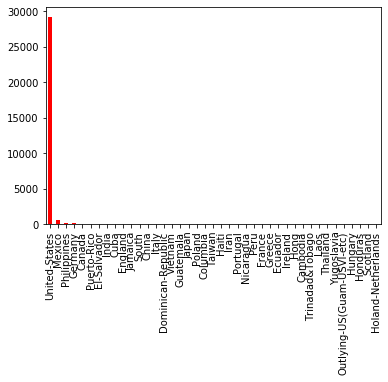

In [0]:
datacount.plot(kind="bar", color = 'r')

In [0]:
Exponential_noise = np.random.exponential(1) 
print ("Exponentially generated noise:", Exponential_noise)

Exponentially generated noise: 1.2829631318059518


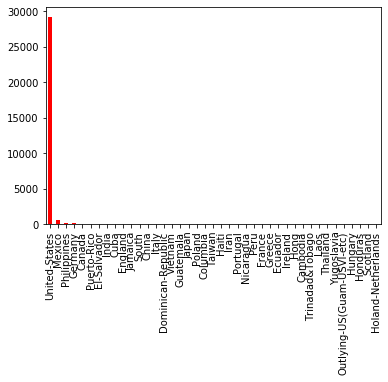

In [0]:
noisydata = datacount + Exponential_noise
noisydata.plot(kind="bar", color = 'r')

In [0]:
noisydata

United-States                 29170.282963
Mexico                          644.282963
Philippines                     199.282963
Germany                         138.282963
Canada                          122.282963
Puerto-Rico                     115.282963
El-Salvador                     107.282963
India                           101.282963
Cuba                             96.282963
England                          91.282963
Jamaica                          82.282963
South                            81.282963
China                            76.282963
Italy                            74.282963
Dominican-Republic               71.282963
Vietnam                          68.282963
Guatemala                        65.282963
Japan                            63.282963
Poland                           61.282963
Columbia                         60.282963
Taiwan                           52.282963
Haiti                            45.282963
Iran                             44.282963
Portugal   

In [0]:
# Tokenize Travel Chain
from keras.preprocessing.text import Tokenizer

tr_token = Tokenizer(num_words=None)
tr_token.fit_on_texts(trips_data['TRAVEL'])
tr_tokens = tr_token.texts_to_sequences(trips_data['TRAVEL'])
trips_data['TRIPS'] = tr_tokens

In [0]:
# Pad sequences
from keras.preprocessing.sequence import pad_sequences
trips_seq = pad_sequences(trips_data['TRIPS'],padding='post', maxlen=15)

In [0]:
len(tr_token.word_index)

110354

In [0]:
df_outer['TRAVEL'].to_csv('drive/My Drive/ThesisProposal/export_trip_101119.csv', index = None, header=True)

**Pre-Training**

In [0]:
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import Input, Dropout, Concatenate, Embedding, Dense, LSTM, Lambda
from keras.models import Model, Sequential
import keras.backend as K

_session = tf.Session()
K.set_session(_session)

**Reinforcement Learning**

In [0]:
# from models import Generator, GeneratorPretraining, Discriminator
# from utils import DiscriminatorGenerator
import keras.backend as K
import numpy as np

class  Agent ( object ):
    '''
    On each step, Agent act on state.
    Then Environment return next state, reward, and so on.
    '''
    def  __init__ ( self , sess , batch_size , vocab_dim , embedding_dim , hidden_size , lr = 1e-3 ):
        self .sess = sess
        self .num_actions = vocab_dim
        self .B = batch_size
        self .V = vocab_dim
        self .E = embedding_dim
        self .H = hidden_size
        self .lr = lr
        self .eps =  0.1
        self .generator = Generator (sess, B, V, E, H, lr)

    def  act ( self , state , epsilon = 0 , deterministic = False ):
        '''
        # Arguments:
            state: numpy array, dtype = int, shape = (B, t)
            epsilon: float, 0 <= epsilon <= 1,
                if epsilon is 1, the Agent will act completely random.
        # Returns:
            action: numpy array, dtype = int, shape = (B, 1)
        '''
        trip = state[:, - 1 ].reshape ([ - 1 , 1 ])
        return  self._act_on_trip (trip, epsilon = epsilon, deterministic = deterministic)


    def  _act_on_trip ( self , trip , epsilon = 0 , deterministic = False , PAD = 0 , EOS = 2 ):
        '''
        # Arguments:
            trip: numpy array, dtype = int, shape = (B, 1),
                trip indicates current trip.
            epsilon: float, 0 <= epsilon <= 1,
                if epsilon is 1, the Agent will act completely random.
        # Returns:
            action: numpy array, dtype = int, shape = (B, 1)
        '''
        action =  None
        is_PAD = trip ==  PAD
        is_EOS = trip ==  EOS
        is_end = is_PAD.astype (np.int) + is_EOS.astype (np.int)
        is_end =  1  - is_end
        is_end = is_end.reshape ([ self .B, 1 ])

        if np.random.rand () <= epsilon:
            action = np.random.randint ( low = 0 , high = self.num_actions, size = ( self.B, 1 ))
        elif  not deterministic:
            probs =  self .generator.predict (trip)
            action =  self .generator.sampling_trip(probs).reshape ([ self.B, 1 ]) ###### cross check
        else :
            probs =  self .generator.predict (trip) # (B, T)
            action = np.argmax (probs, axis = - 1 ).reshape ([ self.B, 1 ])
        return action * is_end

    def  reset ( self ):
        self.generator.reset_rnn_state ()

    def  save ( self , path ):
        self.generator.save (path)

    def  load ( self , path ):
        self.generator.load (path)


class  Environment ( object ):
    '''
    On each step, Agent act on state.
    Then Environment return next state, reward, and so on.
    '''
    def  __init__ ( self , discriminator , data_generator , g_beta , n_sample = 16 ):
        '''
        Environment class for Reinforced Learning
        # Arguments:
            discriminator: keras model
            data_generator: SeqGAN.models.GeneratorPretrainingGenerator
            g_beta: SeqGAN.rl.Agent, copy of Agent
                params of g_beta.generator should be updated with those of original
                generator on regular occasions.
        # Optional Arguments
            n_sample: int, default is 16, the number of Monte Carlo search sample
        '''
        self.data_generator = data_generator
        self.B = data_generator.B
        # self.t = data_generator.T
        self.T = data_generator.T
        self.n_sample = n_sample
        self.BOS  = data_generator.BOS    #Begin of sentence
        self.discriminator = discriminator
        self.g_beta = g_beta
        self.reset ()

    def  get_state ( self ):
        if  self.t ==  1 :
            return  self._state
        else:
            return  self._state [:, 1 :]    # Exclude BOS

    def  reset ( self ):
        self.t =  1
        self._state = np.zeros ([ self.B, 1 ], dtype = np.int32)
        self._state [:, 0 ] =  self.BOS
        self.g_beta.reset ()

    def  step ( self , action ):
        '''
        Step t-> t + 1 and returns a result of the Agent action.
        # Arguments:
            action: numpy array, dtype = int, shape = (B, 1),
                state is Y_0: t-1, and action is y_t
        # Returns:
            next_state: numpy array, dtype = int, shape = (B, t)
            reward: numpy array, dtype = float, shape = (B, 1)
            is_episode_end: bool
            info: dict
        '''
        self.t =  self.t +  1

        reward =  self.Q (action, self .n_sample)
        is_episode_end =  self.T >  self.T

        self ._append_state (action)
        next_state =  self.get_state ()
        info =  None

        return [next_state, reward, is_episode_end, info]

    def  render ( self , head = 1 ):
        for i in  range (head):
            ids =  self .get_state () [i]
            words = [ self .data_generator.id2word [ id ] for  id  in ids.tolist ()]
            print ( ' ' .join (words))
        print ( ' - '  *  80 )


    def  Q ( self , action , n_sample = 16 ):
        '''
        State-Action value function using Rollout policy
        # Arguments:
            action: numpy array, dtype = int, shape = (B, 1)
        # Optional Arguments:
            n_sample: int, default is 16, number of samples for Monte Calro Search
        # Returns:
            reward: numpy array, dtype = float, shape = (B,), State-Action value
        # Requires:
            t, T: used to define time range.
            state: determined texts, Y [0: t-1], used for Rollout.
            action: next words, y [t], used for sentence Y [0: t].
            g_beta: Rollout policy.
        '''
        h, c =  self.g_beta.generator.get_rnn_state ()
        reward = np.zeros([self.B, 1 ])
        if  self.t ==  2 :
            Y_base =  self._state     # Initial case
        else:
            Y_base =  self.get_state ()     # (B, t-1)

        if  self.t >=  self.T + 1 :
            Y =  self._append_state (action, state = Y_base)
            return  self.discriminator.predict (Y)

        # Rollout
        for idx_sample in  range (n_sample):
            Y = Y_base
            self.g_beta.generator.set_rnn_state (h, c)
            y_t =  self.g_beta.act (Y, epsilon = self .g_beta.eps)
            Y =  self._append_state (y_t, state = Y)
            for tau in  range ( self.t + 1, self.T):
                y_tau =  self .g_beta.act (Y, epsilon = self.g_beta.eps)
                Y =  self ._append_state (y_tau, state = Y)
            reward +=  self .discriminator.predict (Y) / n_sample

        return reward


    def  _append_state ( self , trip , state = None ):
        '''
        # Arguments:
            trip: numpy array, dtype = int, shape = (B, 1)
        '''
        trip = trip.reshape ( - 1 , 1 )
        if state is  None :
          self ._state = np.concatenate ([ self._state, trip], axis = -1 )
        else :
          return np.concatenate ([state, trip], axis =  -1 )

In [0]:
seqgan = SeqGAN()

In [0]:
class Trainer():

  def __init__ (self, vocab_size, g_data, d_data = None):
    self.batch_size = 64
    self.seq_len = 64
    self.vocab_size = vocab_size
    self.n_sample = 16
    self.d_dropout = 0.01
    self.g_lr = 1e-3
    self.d_lr = 1e-3
    self.g_E, self.d_E = 50
    self.g_H, self.d_H = 50
    self.g_data = g_data
    self.d_data = d_data
    self.agent = Agent(_session, self.batch_size, self.vocab_size, self.g_E, self.g_H, self.g_lr)
    self.g_beta = Agent(_session, self.batch_size, self.vocab_size, self.g_E, self.g_H, self.g_lr )
    self.critic = Discriminator(self.vocab_size, self.d_E, dropout = self.d_dropout)
    self.env = Environment(self.critic, self.g_data, self.g_beta, n_sample=self.n_sample)
    self.generator_pre = GeneratorPreTraining(self.vocab_size, self.g_E, self.g_H)


  

# **Generative Model**

In [0]:
class SeqGAN():
  
  def __init__(self):
    self.seq_length = 15
    self.seq_shape = (self.seq_length, 1)
    self.latent_dim = 100
    self.disc_loss = []
    self.gen_loss =[]
    self.vocab_size = 1000
    self.data_shape = (39,)
    self.batch_size = 64
    self.hidden_size = 64
    self.embedding_size = 64

    optimizer = Adam(0.0002, 0.5)

    # Build and compile the discriminator
    self.discriminator = self.build_discriminator()
    self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Build the generator
    self.generator = self.build_generator()

    # The generator takes noise as input and generates note sequences
    z = Input(shape=(self.latent_dim,))
    generated_seq = self.generator(z)

    # For the combined model we will only train the generator
    self.discriminator.trainable = False

    # The discriminator takes generated images as input and determines validity
    validity = self.discriminator(generated_seq)

    # The combined model  (stacked generator and discriminator)
    # Trains the generator to fool the discriminator
    self.combined = Model(z, validity)
    self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


  def  pretrain_generator (self):

    model = Sequential()
    model.add(Embedding(self.vocab_size, 64, mask_zero=True, name='Embedding'))
    model.add(LSTM(64, return_sequences=True, name='LSTM'))
    model.add(TimeDistributed(Dense(self.vocab_size, activation='softmax')))
    model.summary()

    data_input = Input(shape=(self.data_shape), dtype='int32', name='Input')
    output = model(data_input)

    return Model(data_input, output)


  def build_generator(self):

    model = Sequential()
    model.add(Embedding(self.vocab_size, 64, mask_zero=True))
    model.add(LSTM(64, dropout_U = 0.2, dropout_W = 0.2, return_sequences=True))
    model.add(Dense(self.vocab_size, activation='softmax'))
    
    data_input = Input(shape=(self.data_shape), dtype='int32', name='Input')
    out = model(data_input)

    return Model(data_input, out) 


  def reset_rnn_state (self):
    self.h = np.zeros([self.batch_size, self.hidden_size])
    self.c = np.zeros([self.batch_size, self.hidden_size])

  def set_rnn_state(self, h, c):
    self.h = h
    self.c = c

  def get_rnn_state(self):
    return self.h, self.c


  def predict(self, state, stateful = True):
    feed_dict = {
        self.state_in: state,
        self.h_in: self.h,
        self.c_in: self.c
    }
    prob, next_h, next_c = self.sess.run(
        [self.prob, self.next_h, self.next_c], feed_dict
    )

    if stateful:
      self.h = next_h
      self.c = next_c
      return prob
    else:
      return prob, next_h, next_c


  def update(self, state, action, reward, h=None, c=None, stateful=True):
    if h is None:
      h = self.h
    if c is None:
      c= self.c
    state = state[:, -1].reshape(-1, 1)
    reward = reward.reshape(-1)
    feed_dict = {
        self.state_in: state,
        self.h_in: h,
        self.c_in: c,
        self.action: to_categorical(action, self.vocal_size),
        self.reward: reward
    }
    _, loss, next_h, next_c = self.sess.run(
        [self.minimize, self.loss, self.next_h, self.next_c], feed_dict
    )

    if stateful:
      self.h = next_h,
      self.c = next_c,
      return loss
    else:
      return loss, next_h, next_c


  def sampling_trip(self, prob):
    action = np.zeros((self.batch_size,), dtype='int32')
    for i in range(self.batch_size):
      p = prob[i]
      action = np.random.choice(self.vocab_size, p = p)
    return action


  def sampling_trip_chain(self, T, BOS=1):
    self.reset_rnn.state()
    action = np.zeros([self.batch_size, 1], dtype='int32')
    action[:, 0] = BOS
    actions = action
    for _ in range(T):
      prob = self.predict(action)
      action = self.sampling_trip(prob).reshape(-1, 1)
      actions = np.concatenate([actions, action], axis=-1)
    
    actions = actions[:, 1:]
    self.reset_rnn_state()
    return actions


  def generate_trips(self, T, g_data, num, output_file):
    trip_chains = []
    for _ in range(num // self.batch_size + 1):
      actions = self.sampling_trip_chain(T)
      actions_list = actions.tolist()

      for chain_id in actions_list:
        chain  = [g_data.id2word[action] for action in chain_id]
        trip_chains.append(chain)
      output_str = ' '
      for i in range(num):
        output_str += ' '.join(trip_chains[i] + '\n')
      with io.open(output_file, 'w', encoding='utf-8') as f:
        f.write(output_str)


  def save(self, path):
    weights = []
    for layer in self.layers:
      w = layer.get_weights()
      weights.append(w)
    with io.open(path, 'wb') as f:
      pickle.dump(weights, f)


  def load(self, path):
    with io.open(path, 'rb') as f:
      weights = pickle.load(f)
    for layer, w in zip(self.layers, weights):
      layer.set_weights(w)


  def  Highway (self, x , num_layers = 1 , activation = 'relu' , name_prefix = '' ):
    input_size = K.int_shape (x) [ 1 ]
    for i in  range (num_layers):
        gate_ratio_name =  '{}Highway/Gate_ratio_{}'.format (name_prefix, i)
        fc_name =  '{}Highway/FC_{}'.format (name_prefix, i)
        gate_name =  '{}Highway/Gate_{}'.format (name_prefix, i)

        gate_ratio = Dense (input_size, activation = 'sigmoid' , name = gate_ratio_name) (x)
        fc = Dense (input_size, activation = activation, name = fc_name) (x)
        x = Lambda ( lambda  args : args [ 0 ] * args [ 2 ] + args [ 1 ] * ( 1  - args [ 2 ]), name = gate_name) ([fc, x, gate_ratio])
    return x


  def  pre_train_generator (self , g_epochs = 3, g_pre_path = None, lr = 1e-3 ):
    if g_pre_path is  None:
        self.g_pre_path = os.path.join (self.top, 'data', 'save', 'generator_pre.hdf5' )
    else :
        self.g_pre_path = g_pre_path

    g_adam = Adam (lr)
    self.generator_pre.compile (g_adam, 'categorical_crossentropy' )
    print (' Generator pre-training ' )
    self.generator_pre.summary ()

    self.generator_pre.fit_generator (
        self.g_data,
        steps_per_epoch = None,
        epochs = g_epochs)
    self .generator_pre.save_weights (self.g_pre_path)
    self .reflect_pre_train()


  def  pre_train_discriminator (self, d_epochs = 1, d_pre_path = None, lr = 1e-3 ):
        if d_pre_path is  None:
            self.d_pre_path = os.path.join (self.top, 'data', 'save', 'discriminator_pre.hdf5' )
        else:
            self.d_pre_path = d_pre_path

        print ('Start Generating sentences ')
        self.agent.generator.generate_samples (self.T, self.g_data,
            self.generate_samples, self.path_neg)

        self .d_data = DiscriminatorGenerator (
            path_pos = self.path_pos,
            path_neg = self.path_neg,
            B = self.B,
            shuffle = True )

        d_adam = Adam (lr)
        self.discriminator.compile (d_adam, 'binary_crossentropy' )
        self.discriminator.summary ()
        print('Discriminator pre-training ' )

        self.discriminator.fit_generator (
            self.d_data,
            steps_per_epoch = None ,
            epochs = d_epochs)
        self.discriminator.save (self.d_pre_path)


  def build_discriminator(self, dropout=0.1):

    data_input = Input( shape=(None,), dtype='int32', name='Input')

    out = Embedding(self.vocab_size, self.embedding_size, mask_zero = True, name='Embedding') (data_input)
    out = LSTM (self.hidden_size) (out)
    out = self.Highway (out, num_layers = 1)
    out = Dropout (dropout, name='Dropout') (out)
    output = Dense(1, activation='sigmoid') (out)

    return Model(data_input, output)

  def  Highway (self, x , num_layers = 1 , activation = 'relu' , name_prefix = '' ):
    input_size = K.int_shape (x) [ 1 ]
    for i in  range (num_layers):
        gate_ratio_name =  '{}Highway/Gate_ratio_{}'.format (name_prefix, i)
        fc_name =  '{}Highway/FC_{}'.format (name_prefix, i)
        gate_name =  '{}Highway/Gate_{}'.format (name_prefix, i)

        gate_ratio = Dense (input_size, activation = 'sigmoid' , name = gate_ratio_name) (x)
        fc = Dense (input_size, activation = activation, name = fc_name) (x)
        x = Lambda ( lambda  args : args [ 0 ] * args [ 2 ] + args [ 1 ] * ( 1  - args [ 2 ]), name = gate_name) ([fc, x, gate_ratio])
    return x

  def train(self, train_data, epochs, batch_size=128, sample_interval=50, g_epochs=1):

    # Load and convert the data
    # x_train, y_train = prepare_data(data)
    X_train = train_data

    # Adversarial ground truths
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    d_adam = Adam(self.d_lr)
    self.discriminator.compile(d_adam, 'binary_crossentropy')

    # Training the model
    for epoch in range(epochs):

      # Generator training
      for _ in range(g_epochs):
        rewards = np.zeros([self.batch_size, self.T])
        self.agent.reset()
        self.env.reset()
        
        for t in range(self.T):
          state = self.env.get_state()
          action = self.agent.act(state, epsilon=0.0)
          next_state, reward, is_episode_end, info = self.env.step(action)
          self.agent.generator.update(state, action, reward)
          rewards[:, t] = reward.reshape([self.B,])
          if is_episode_end:
            if verbose:
              print('Reward: {: .3f}, Episode end'.format(np.average(rewards)))
              self.env.render(head = head)
            break


      # Discriminator training
      for _ in range(d_epochs):
        self.agent.generator.generate_samples(
            self.T,
            self.g_data,
            self.generate_samples,
            self.path_neg)
        
        self.d_data = DiscriminatorGenerator(
            path_pos = self.path_pos,
            path_neg = self.path_neg,
            batch_size = self.batch_size,
            shuffle = True
        )
        self.discriminator.fit_generator(
            self.d_data,
            steps_per_epoch = None,
            epochs = d_epochs
        )

        # Update env.g_beta to agent
        self.agent_save (g_weights_path)
        self.g_beta.load(g_weights_path)

        self.discriminator.save(d_weights_path)
        self.epsilon = max(self.epsilon * (1-float(step) / steps * 4), 1e-4)





      # Training the discriminator
      # Select a random batch of note sequences
      idx = np.random.randint(0, X_train.shape[0], batch_size)
      real_seqs = X_train[idx]

      # Noise
      noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

      # Generate a batch of new sequences
      gen_seqs = self.generator.predict(noise)

      # Train the discriminator
      d_loss_real = self.discriminator.train_on_batch(real_seqs, real)
      d_loss_fake = self.discriminator.train_on_batch(gen_seqs, fake)
      d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

      # Train the Generator
      noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

      # Train the generator (to have the discriminator label samples as real)
      g_loss = self. combined.train_on_batch(noise, real)
      
    self.discriminator.save('drive/My Drive/ThesisProposal/gan-mix-discriminator.h5')
    self.generator.save('drive/My Drive/ThesisProposal/gan-mix-generator.h5')


  def save_model( self, g_path, d_path ):
    self.agent.save (g_path)
    self.discriminator.save (d_path)


  def load_model(self, g_path, d_path ):
    self.agent.load (g_path)
    self.g_beta.load (g_path)
    self.discriminator.load_weights (d_path)


In [0]:
https://github.com/cs109/a-2017/tree/master/Lectures
https://harvard-iacs.github.io/2019-CS109B/pages/schedule.html